In [415]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [215]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

In [216]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [217]:
test.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [218]:
train.shape, test.shape

((6368, 15), (3430, 14))

In [219]:
train.columns

Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Customer_name', 'Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price', 'Selling_Price'],
      dtype='object')

In [228]:
train.shape

(6368, 15)

In [225]:
train.isna().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       211
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

In [229]:
train.dropna(subset=['Selling_Price'], inplace=True)

In [232]:
train.shape

(6327, 15)

In [230]:
train = train.reset_index(drop=True)

In [233]:
train.duplicated().sum()

0

In [234]:
data = pd.concat([train,test])

In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9757 entries, 0 to 3429
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_id        9757 non-null   object 
 1   Stall_no          9751 non-null   float64
 2   instock_date      9757 non-null   object 
 3   Market_Category   9757 non-null   int64  
 4   Customer_name     9497 non-null   object 
 5   Loyalty_customer  9757 non-null   object 
 6   Product_Category  9757 non-null   object 
 7   Grade             9757 non-null   int64  
 8   Demand            9757 non-null   int64  
 9   Discount_avail    9720 non-null   float64
 10  charges_1         9523 non-null   float64
 11  charges_2 (%)     9548 non-null   float64
 12  Minimum_price     9705 non-null   float64
 13  Maximum_price     9416 non-null   float64
 14  Selling_Price     6327 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 1.2+ MB


In [236]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Stall_no,9751.0,25.425187,14.352011,1.00,13.00000,25.00000,38.000000,50.000000
Market_Category,9757.0,198.254279,169.785262,0.00,55.00000,128.00000,389.000000,471.000000
Grade,9757.0,0.652352,1.032715,0.00,0.00000,0.00000,2.000000,3.000000
Demand,9757.0,50.569232,28.917136,1.00,26.00000,50.00000,76.000000,100.000000
Discount_avail,9720.0,0.142284,0.349359,0.00,0.00000,0.00000,0.000000,1.000000
charges_1,9523.0,264.952221,124.808461,100.00,163.00000,252.00000,317.000000,649.000000
charges_2 (%),9548.0,10.254504,4.288896,1.00,7.00000,10.00000,14.000000,17.000000
Minimum_price,9705.0,3502.293251,2188.640210,1.00,1864.00000,3128.00000,4668.000000,17580.000000
Maximum_price,9416.0,6362.493309,3667.385509,163.00,3883.00000,5558.50000,8003.250000,58812.000000
Selling_Price,6327.0,4563.242592,2979.102408,-6062.47,2450.00528,4210.38464,6167.643252,22638.325941


In [237]:
data = data.reset_index(drop=True)

In [238]:
data.corr()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
Stall_no,1.000000,-0.004047,-0.008713,0.000317,-0.009574,-0.010716,-0.004239,-0.003949,-0.004439,0.011733
Market_Category,-0.004047,1.000000,-0.034151,-0.015518,-0.000215,0.020660,0.016457,0.199884,0.145650,0.138711
Grade,-0.008713,-0.034151,1.000000,0.003397,-0.027969,-0.017184,-0.014640,-0.077175,0.169504,0.086450
Demand,0.000317,-0.015518,0.003397,1.000000,-0.004337,-0.003608,0.013847,-0.008415,-0.012208,-0.000601
Discount_avail,-0.009574,-0.000215,-0.027969,-0.004337,1.000000,-0.002041,0.018585,0.013961,0.002116,-0.512457
charges_1,-0.010716,0.020660,-0.017184,-0.003608,-0.002041,1.000000,0.276583,0.021734,0.019301,0.053045
charges_2 (%),-0.004239,0.016457,-0.014640,0.013847,0.018585,0.276583,1.000000,0.012084,0.009368,0.009031
Minimum_price,-0.003949,0.199884,-0.077175,-0.008415,0.013961,0.021734,0.012084,1.000000,0.719903,0.700444
Maximum_price,-0.004439,0.145650,0.169504,-0.012208,0.002116,0.019301,0.009368,0.719903,1.000000,0.766928
Selling_Price,0.011733,0.138711,0.086450,-0.000601,-0.512457,0.053045,0.009031,0.700444,0.766928,1.000000


<AxesSubplot:>

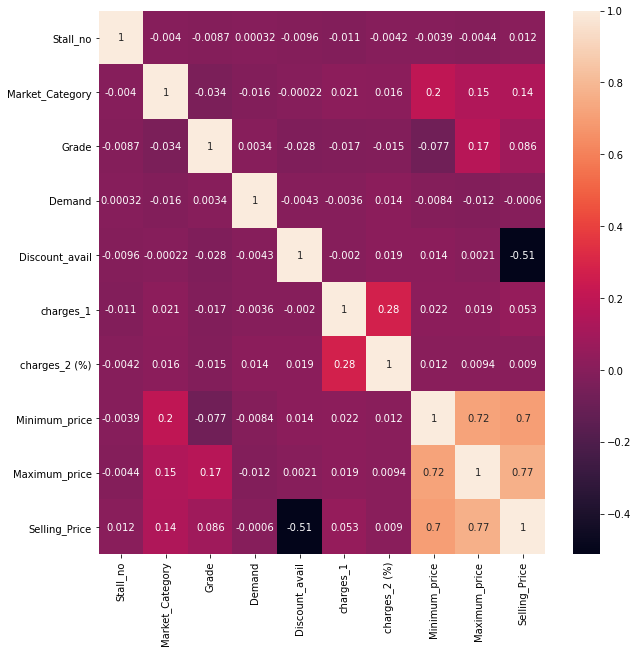

In [239]:
matplotlib.rcParams["figure.figsize"] = (10,10)
sns.heatmap(data.corr(), annot=True,)

In [240]:
data

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9752,BBAE9K7BXFUTDNBK,9.0,2015-08-15 21:17:17.000,58,Davion,Yes,Pet_care,0,39,0.0,117.0,5.0,3094.0,4674.0,NaN
9753,RTRDYPA4PJHCJCGF,30.0,2015-12-04 01:51:47.000,358,Maiah,Yes,Technology,3,17,0.0,509.0,6.0,3384.0,14105.0,NaN
9754,TUNE8FWQBS7TVVT7,14.0,2016-03-28 20:55:47.000,106,Gwendolen,Yes,Educational,0,36,0.0,150.0,17.0,710.0,10894.0,NaN
9755,NKCEGMUABCRGUZPE,1.0,2015-05-23 07:41:36.000,104,Addilynn,Yes,Child_care,0,63,0.0,325.0,15.0,1477.0,5165.0,NaN


In [241]:
numerical_columns = data.select_dtypes(include=np.number).drop(columns=['Selling_Price', 'Minimum_price', 'Maximum_price']).columns

In [242]:
numerical_columns

Index(['Stall_no', 'Market_Category', 'Grade', 'Demand', 'Discount_avail',
       'charges_1', 'charges_2 (%)'],
      dtype='object')

In [243]:
category_columns = data.select_dtypes(exclude=np.number).drop(columns=['instock_date']).columns

In [244]:
category_columns

Index(['Product_id', 'Customer_name', 'Loyalty_customer', 'Product_Category'], dtype='object')

In [245]:
category_columns

Index(['Product_id', 'Customer_name', 'Loyalty_customer', 'Product_Category'], dtype='object')

In [246]:
data['Product_Category'].value_counts()

Pet_care       1025
Repair         1011
Child_care     1003
Cosmetics       992
Educational     960
Technology      957
Hospitality     955
Organic         954
Home_decor      951
Fashion         949
Name: Product_Category, dtype: int64

In [247]:
data.isna().sum()

Product_id             0
Stall_no               6
instock_date           0
Market_Category        0
Customer_name        260
Loyalty_customer       0
Product_Category       0
Grade                  0
Demand                 0
Discount_avail        37
charges_1            234
charges_2 (%)        209
Minimum_price         52
Maximum_price        341
Selling_Price       3430
dtype: int64

In [248]:
data[numerical_columns].apply(lambda x: x.nunique())

Stall_no            50
Market_Category    275
Grade                4
Demand             100
Discount_avail       2
charges_1          494
charges_2 (%)       17
dtype: int64

In [249]:
data[category_columns].apply(lambda x: x.nunique())

Product_id          9757
Customer_name       8927
Loyalty_customer       2
Product_Category      10
dtype: int64

In [250]:
data.duplicated().sum()

0

<AxesSubplot:xlabel='Market_Category'>

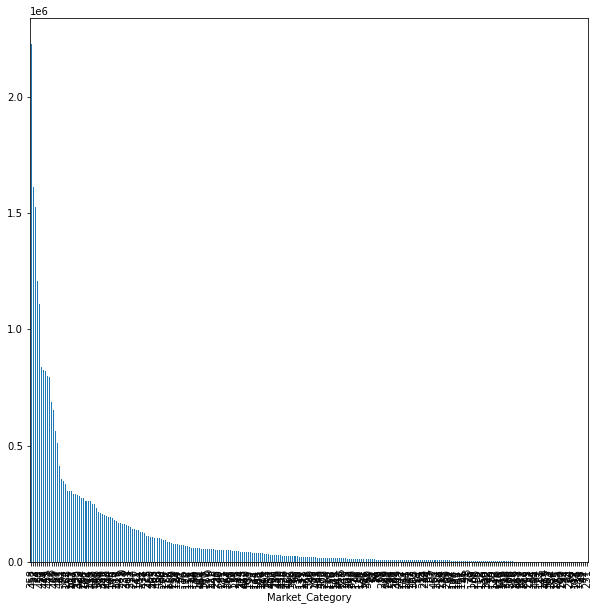

In [251]:
data.groupby("Market_Category").Selling_Price.sum().sort_values(ascending=False).plot(kind = "bar")

<AxesSubplot:xlabel='Product_Category'>

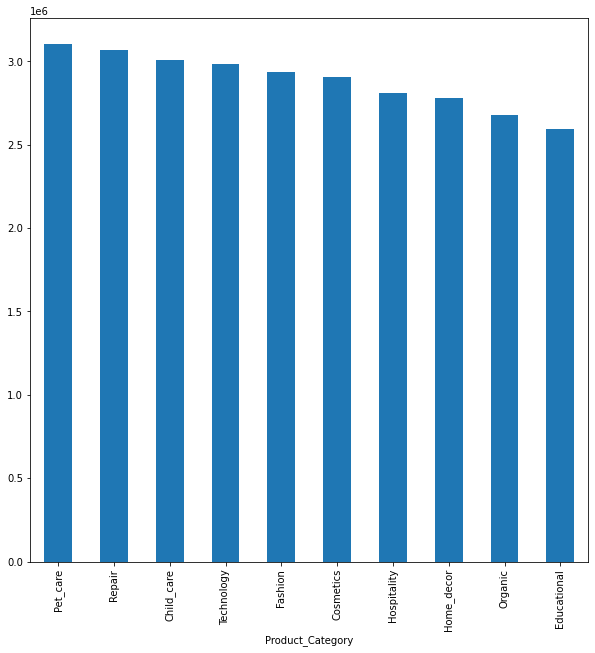

In [252]:
data.groupby("Product_Category").Selling_Price.sum().sort_values(ascending=False).plot(kind = "bar")

In [49]:
data.boxplot(column = "Grade", by = "Selling_Price", rot = 90)

<AxesSubplot:title={'center':'Grade'}, xlabel='Selling_Price'>

Error in callback <function flush_figures at 0x0000017461D5A1F0> (for post_execute):


KeyboardInterrupt: 

In [255]:
data['Loyalty_customer'].value_counts()

Yes    5949
No     3808
Name: Loyalty_customer, dtype: int64

In [256]:
data.columns

Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Customer_name', 'Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price', 'Selling_Price'],
      dtype='object')

In [257]:
data['Product_id'].nunique()

9757

<AxesSubplot:xlabel='Loyalty_customer'>

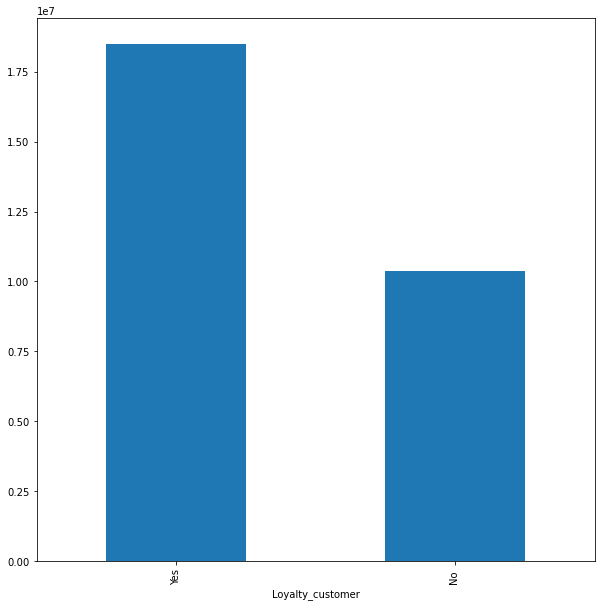

In [258]:
data.groupby("Loyalty_customer").Selling_Price.sum().sort_values(ascending=False).plot(kind = "bar")

<AxesSubplot:xlabel='Grade'>

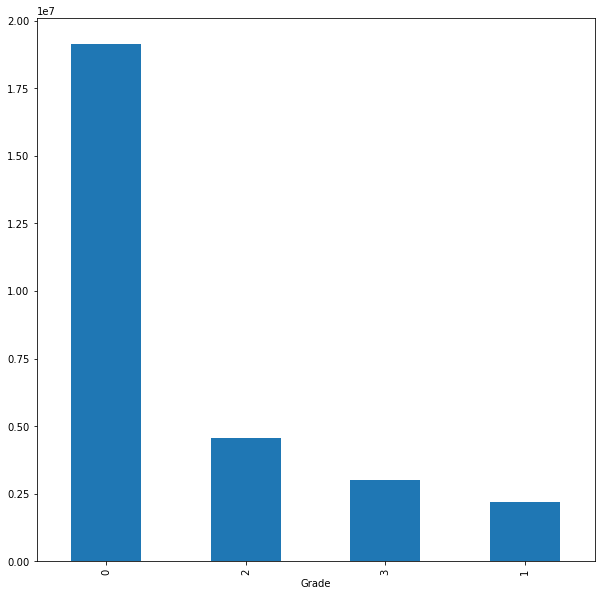

In [259]:
data.groupby("Grade").Selling_Price.sum().sort_values(ascending=False).plot(kind = "bar")

<AxesSubplot:xlabel='Demand'>

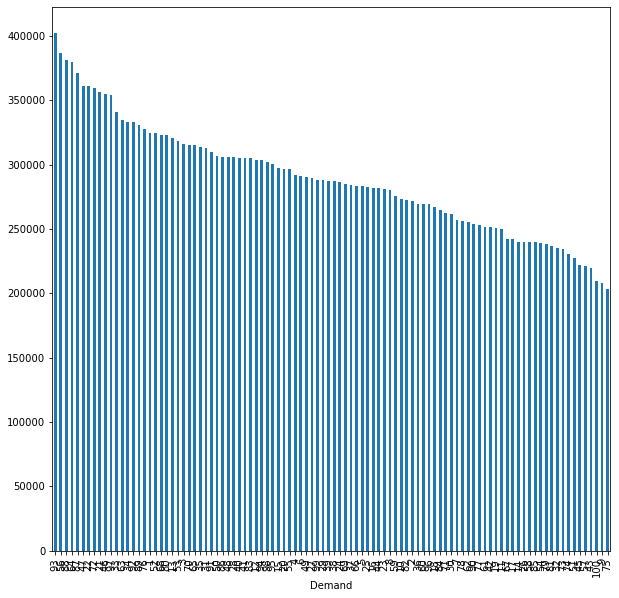

In [260]:
data.groupby("Demand").Selling_Price.sum().sort_values(ascending=False).plot(kind = "bar")

In [261]:
data.isna().sum()

Product_id             0
Stall_no               6
instock_date           0
Market_Category        0
Customer_name        260
Loyalty_customer       0
Product_Category       0
Grade                  0
Demand                 0
Discount_avail        37
charges_1            234
charges_2 (%)        209
Minimum_price         52
Maximum_price        341
Selling_Price       3430
dtype: int64

In [262]:
data[data.Stall_no.isna()]

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
554,NKCEAX7HMXEAZEFR,NaN,2015-11-21 03:56:08.000,151,Dylon,Yes,Fashion,0,57,0.0,358.0,15.0,715.0,3433.0,2419.525296
2809,NKCE3Y6EKYJEFUYV,NaN,2015-09-25 15:30:37.000,469,Kaily,No,Hospitality,0,99,0.0,321.0,14.0,3196.0,NaN,4018.537600
3016,NKCE6P3FFZHHTYSR,NaN,2015-09-25 15:22:13.000,469,Nava,Yes,Repair,0,90,0.0,251.0,2.0,3605.0,4590.0,4286.689792
4593,CRTECN2RRRSAH7JT,NaN,2015-09-24 14:28:24.000,24,Anasofia,No,Home_decor,0,2,0.0,284.0,15.0,3402.0,5084.0,4532.906664
4596,CAGE68FGFNP5CSBD,NaN,2015-11-18 20:45:29.000,458,Gabby,Yes,Organic,0,86,0.0,119.0,8.0,9481.0,11267.0,10350.081280
7434,BRAECFAQXWGHUZDQ,NaN,2015-08-19 18:36:26.000,320,Deon,Yes,Fashion,0,4,0.0,395.0,17.0,365.0,2401.0,NaN


In [263]:
data[data.Product_id == 'NKCEAX7HMXEAZEFR']

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
554,NKCEAX7HMXEAZEFR,NaN,2015-11-21 03:56:08.000,151,Dylon,Yes,Fashion,0,57,0.0,358.0,15.0,715.0,3433.0,2419.525296


In [264]:

data[data.Product_id == 'NKCE6P3FFZHHTYSR']

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
3016,NKCE6P3FFZHHTYSR,NaN,2015-09-25 15:22:13.000,469,Nava,Yes,Repair,0,90,0.0,251.0,2.0,3605.0,4590.0,4286.689792


In [265]:
data[data.Product_id == 'NKCE3Y6EKYJEFUYV']

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
2809,NKCE3Y6EKYJEFUYV,NaN,2015-09-25 15:30:37.000,469,Kaily,No,Hospitality,0,99,0.0,321.0,14.0,3196.0,NaN,4018.5376


In [266]:
import scipy
data.pivot_table(values="Product_id", index = "Stall_no",aggfunc = scipy.stats.mode)

,Product_id
Stall_no,
1.0,"([ACCDRREFMB99QZ42], [1])"
2.0,"([ACBECFGTHZZWGEHV], [1])"
3.0,"([ACBECFGT7MVYRRHJ], [1])"
4.0,"([ACBECZG4GBUS9ZE7], [1])"
5.0,"([ABQEJ7YQTNQGMXZV], [1])"
6.0,"([ACCDWGG3HSCGUN9V], [1])"
7.0,"([ACCDXH5G5BB2BGUA], [1])"
8.0,"([ACBECFGTQUJ7XHXJ], [1])"
9.0,"([ACBECFGTYJ3E8VHE], [1])"


In [267]:
data.Discount_avail.value_counts()

0.0    8337
1.0    1383
Name: Discount_avail, dtype: int64

In [268]:
data.select_dtypes(include = np.number).corr()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
Stall_no,1.000000,-0.004047,-0.008713,0.000317,-0.009574,-0.010716,-0.004239,-0.003949,-0.004439,0.011733
Market_Category,-0.004047,1.000000,-0.034151,-0.015518,-0.000215,0.020660,0.016457,0.199884,0.145650,0.138711
Grade,-0.008713,-0.034151,1.000000,0.003397,-0.027969,-0.017184,-0.014640,-0.077175,0.169504,0.086450
Demand,0.000317,-0.015518,0.003397,1.000000,-0.004337,-0.003608,0.013847,-0.008415,-0.012208,-0.000601
Discount_avail,-0.009574,-0.000215,-0.027969,-0.004337,1.000000,-0.002041,0.018585,0.013961,0.002116,-0.512457
charges_1,-0.010716,0.020660,-0.017184,-0.003608,-0.002041,1.000000,0.276583,0.021734,0.019301,0.053045
charges_2 (%),-0.004239,0.016457,-0.014640,0.013847,0.018585,0.276583,1.000000,0.012084,0.009368,0.009031
Minimum_price,-0.003949,0.199884,-0.077175,-0.008415,0.013961,0.021734,0.012084,1.000000,0.719903,0.700444
Maximum_price,-0.004439,0.145650,0.169504,-0.012208,0.002116,0.019301,0.009368,0.719903,1.000000,0.766928
Selling_Price,0.011733,0.138711,0.086450,-0.000601,-0.512457,0.053045,0.009031,0.700444,0.766928,1.000000


In [269]:
numerical_columns

Index(['Stall_no', 'Market_Category', 'Grade', 'Demand', 'Discount_avail',
       'charges_1', 'charges_2 (%)'],
      dtype='object')

In [270]:
category_columns

Index(['Product_id', 'Customer_name', 'Loyalty_customer', 'Product_Category'], dtype='object')

<AxesSubplot:>

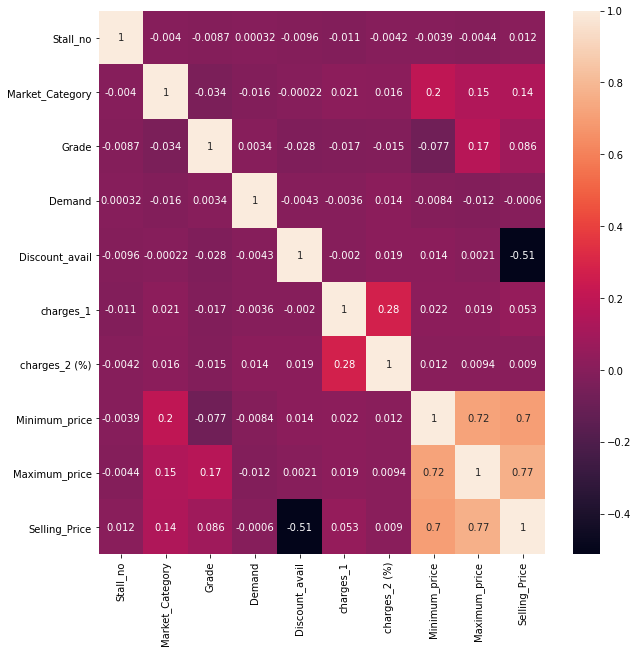

In [271]:
sns.heatmap(data.select_dtypes(include = np.number).corr(), annot=True)

In [272]:
category_data_columns = data.select_dtypes(exclude = np.number).drop(columns=["instock_date", "Product_id","Customer_name"]).columns

In [273]:
category_data_columns

Index(['Loyalty_customer', 'Product_Category'], dtype='object')

In [274]:
data.Loyalty_customer.value_counts()

Yes    5949
No     3808
Name: Loyalty_customer, dtype: int64

In [275]:
numerical_columns = data.select_dtypes(include = np.number).drop(columns=["Stall_no", 'Selling_Price', 'Minimum_price', 'Maximum_price']).columns

In [276]:
numerical_columns

Index(['Market_Category', 'Grade', 'Demand', 'Discount_avail', 'charges_1',
       'charges_2 (%)'],
      dtype='object')

In [277]:
category_data_columns

Index(['Loyalty_customer', 'Product_Category'], dtype='object')

In [278]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [279]:
# calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_columns

vif_data["VIF"] = [variance_inflation_factor(data[numerical_columns], i)
                          for i in range(len(numerical_columns))]
  
print(vif_data)

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [280]:
data[numerical_columns]

,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%)
0,2,1,68,0.0,376.0,11.0
1,24,0,51,0.0,397.0,12.0
2,447,0,10,0.0,250.0,9.0
3,23,2,48,0.0,144.0,13.0
4,63,1,35,1.0,211.0,4.0
...,...,...,...,...,...,...
9752,58,0,39,0.0,117.0,5.0
9753,358,3,17,0.0,509.0,6.0
9754,106,0,36,0.0,150.0,17.0
9755,104,0,63,0.0,325.0,15.0


In [281]:
data[numerical_columns].isna().sum()

Market_Category      0
Grade                0
Demand               0
Discount_avail      37
charges_1          234
charges_2 (%)      209
dtype: int64

In [282]:
data['charges_1'].fillna(0, inplace=True)

In [283]:
data['charges_2 (%)'].fillna(0, inplace=True)

In [284]:
data['Discount_avail'].value_counts()

0.0    8337
1.0    1383
Name: Discount_avail, dtype: int64

In [285]:
data['Discount_avail'].fillna(data['Discount_avail'].mode()[0], inplace=True)

In [286]:
data[numerical_columns].isna().sum()

Market_Category    0
Grade              0
Demand             0
Discount_avail     0
charges_1          0
charges_2 (%)      0
dtype: int64

In [287]:
data[category_data_columns].isna().sum()

Loyalty_customer    0
Product_Category    0
dtype: int64

In [288]:
stdScalar = StandardScaler()

In [289]:
std_scaled = stdScalar.fit_transform(data[numerical_columns])

In [290]:
minMaxScalar = MinMaxScaler()

In [291]:
minMax_scaled = minMaxScalar.fit_transform(data[numerical_columns])

In [348]:
preprocess_numeric_data_columns = pd.DataFrame(std_scaled, columns=numerical_columns)

In [349]:
preprocess_numeric_data_columns

,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%)
0,-1.155956,0.336652,0.602814,-0.406391,0.904561,0.214728
1,-1.026374,-0.631719,0.014897,-0.406391,1.066362,0.437209
2,1.465136,-0.631719,-1.403020,-0.406391,-0.066245,-0.230234
3,-1.032264,1.305023,-0.088853,-0.406391,-0.882956,0.659690
4,-0.796660,0.336652,-0.538436,2.460681,-0.366733,-1.342638
...,...,...,...,...,...,...
9752,-0.826111,-0.631719,-0.400103,-0.406391,-1.090986,-1.120157
9753,0.940917,2.273394,-1.160936,-0.406391,1.929302,-0.897676
9754,-0.543386,-0.631719,-0.503853,-0.406391,-0.836727,1.549613
9755,-0.555167,-0.631719,0.429898,-0.406391,0.511616,1.104652


In [350]:
preprocess_category_data_columns = pd.get_dummies(data[category_data_columns])

In [351]:
final_preprocessed = pd.concat([preprocess_category_data_columns, preprocess_numeric_data_columns, data[["Product_id","Stall_no","Selling_Price"]]], axis = 1)

In [352]:
final_preprocessed

,Loyalty_customer_No,Loyalty_customer_Yes,Product_Category_Child_care,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,...,Product_Category_Technology,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Product_id,Stall_no,Selling_Price
0,0,1,0,0,0,1,0,0,0,0,...,0,-1.155956,0.336652,0.602814,-0.406391,0.904561,0.214728,BRAE2NF6JA5GUEXG,37.0,4185.947700
1,0,1,0,0,0,1,0,0,0,0,...,0,-1.026374,-0.631719,0.014897,-0.406391,1.066362,0.437209,TUNE8SFB6RJN2HSD,38.0,9271.490256
2,0,1,1,0,0,0,0,0,0,0,...,0,1.465136,-0.631719,-1.403020,-0.406391,-0.066245,-0.230234,BRAEAR7WZPQGPBZU,9.0,6785.701362
3,0,1,0,0,1,0,0,0,0,0,...,0,-1.032264,1.305023,-0.088853,-0.406391,-0.882956,0.659690,WATDZ2ZQ8JPDHCTJ,50.0,13028.917824
4,0,1,0,0,0,0,0,0,0,0,...,0,-0.796660,0.336652,-0.538436,2.460681,-0.366733,-1.342638,JWSEBUKYQPMBZ3RK,7.0,906.553935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9752,0,1,0,0,0,0,0,0,0,1,...,0,-0.826111,-0.631719,-0.400103,-0.406391,-1.090986,-1.120157,BBAE9K7BXFUTDNBK,9.0,NaN
9753,0,1,0,0,0,0,0,0,0,0,...,1,0.940917,2.273394,-1.160936,-0.406391,1.929302,-0.897676,RTRDYPA4PJHCJCGF,30.0,NaN
9754,0,1,0,0,1,0,0,0,0,0,...,0,-0.543386,-0.631719,-0.503853,-0.406391,-0.836727,1.549613,TUNE8FWQBS7TVVT7,14.0,NaN
9755,0,1,1,0,0,0,0,0,0,0,...,0,-0.555167,-0.631719,0.429898,-0.406391,0.511616,1.104652,NKCEGMUABCRGUZPE,1.0,NaN


In [353]:
train_preprocessd = final_preprocessed.dropna(subset=["Selling_Price"])

In [354]:
train_preprocessd

,Loyalty_customer_No,Loyalty_customer_Yes,Product_Category_Child_care,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,...,Product_Category_Technology,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Product_id,Stall_no,Selling_Price
0,0,1,0,0,0,1,0,0,0,0,...,0,-1.155956,0.336652,0.602814,-0.406391,0.904561,0.214728,BRAE2NF6JA5GUEXG,37.0,4185.947700
1,0,1,0,0,0,1,0,0,0,0,...,0,-1.026374,-0.631719,0.014897,-0.406391,1.066362,0.437209,TUNE8SFB6RJN2HSD,38.0,9271.490256
2,0,1,1,0,0,0,0,0,0,0,...,0,1.465136,-0.631719,-1.403020,-0.406391,-0.066245,-0.230234,BRAEAR7WZPQGPBZU,9.0,6785.701362
3,0,1,0,0,1,0,0,0,0,0,...,0,-1.032264,1.305023,-0.088853,-0.406391,-0.882956,0.659690,WATDZ2ZQ8JPDHCTJ,50.0,13028.917824
4,0,1,0,0,0,0,0,0,0,0,...,0,-0.796660,0.336652,-0.538436,2.460681,-0.366733,-1.342638,JWSEBUKYQPMBZ3RK,7.0,906.553935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6322,0,1,0,0,0,0,0,0,0,0,...,1,-1.026374,-0.631719,-0.123436,-0.406391,2.738307,-0.007753,WATE7VE2D62VEKW8,17.0,10277.520192
6323,0,1,1,0,0,0,0,0,0,0,...,0,-0.843781,-0.631719,-0.538436,-0.406391,0.080146,-1.120157,SHOEF9G8Z4ZXF6WE,21.0,4501.837200
6324,1,0,0,0,0,0,0,0,0,0,...,0,0.940917,2.273394,-0.745936,-0.406391,0.188013,-1.565119,PBXEB9ZQ7HHCFXYG,36.0,10218.878775
6325,0,1,0,0,0,0,0,0,0,0,...,0,1.494586,-0.631719,-1.472186,-0.406391,0.064736,-1.565119,NKCEAGXHRYTNTMG7,27.0,5359.493997


In [355]:
test_preprocessd = final_preprocessed[final_preprocessed["Selling_Price"].isna()]

In [356]:
test_preprocessd = test_preprocessd.reset_index(drop=True)

In [357]:
test_preprocessd = test_preprocessd.drop(columns="Selling_Price")

In [358]:
test_preprocessd.shape

(3430, 20)

In [359]:
train_preprocessd.to_csv("train_preprocessed.csv")
test_preprocessd.to_csv("test_preprocessed.csv")

In [360]:
train_preprocessd.columns

Index(['Loyalty_customer_No ', 'Loyalty_customer_Yes',
       'Product_Category_Child_care', 'Product_Category_Cosmetics',
       'Product_Category_Educational', 'Product_Category_Fashion',
       'Product_Category_Home_decor', 'Product_Category_Hospitality',
       'Product_Category_Organic', 'Product_Category_Pet_care',
       'Product_Category_Repair', 'Product_Category_Technology',
       'Market_Category', 'Grade', 'Demand', 'Discount_avail', 'charges_1',
       'charges_2 (%)', 'Product_id', 'Stall_no', 'Selling_Price'],
      dtype='object')

In [361]:
model = LinearRegression()

In [362]:
X = train_preprocessd.drop(columns=["Product_id","Stall_no","Selling_Price"])

In [363]:
y = train_preprocessd["Selling_Price"]

In [364]:
model.fit(X,y)

LinearRegression()

In [365]:
mean_squared_error(y, model.predict(X),squared=False)

2501.648695790043

In [366]:
X_test = test_preprocessd.drop(columns=["Product_id","Stall_no"])

In [367]:
y_pred = model.predict(X_test)

In [368]:
mean_squared_error(y_pred, model.predict(X_test))

0.0

In [369]:
X_test.shape

(3430, 18)

In [370]:
X.shape

(6327, 18)

In [371]:
y.shape

(6327,)

In [372]:
test

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3425,BBAE9K7BXFUTDNBK,9.0,2015-08-15 21:17:17.000,58,Davion,Yes,Pet_care,0,39,0,117.0,5.0,3094.0,4674
3426,RTRDYPA4PJHCJCGF,30.0,2015-12-04 01:51:47.000,358,Maiah,Yes,Technology,3,17,0,509.0,6.0,3384.0,14105
3427,TUNE8FWQBS7TVVT7,14.0,2016-03-28 20:55:47.000,106,Gwendolen,Yes,Educational,0,36,0,150.0,17.0,710.0,10894
3428,NKCEGMUABCRGUZPE,1.0,2015-05-23 07:41:36.000,104,Addilynn,Yes,Child_care,0,63,0,325.0,15.0,1477.0,5165


In [373]:
y_pred.shape

(3430,)

In [374]:
final_result_Linear_regression_std_scaler = pd.DataFrame({ 'Product_id': test_preprocessd['Product_id'], 'Selling_Price': y_pred })

In [375]:
final_result_Linear_regression_std_scaler

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,4930.0
1,ACCEGCATKHNRXUHW,4931.0
2,NKCE6GJ5XVJDXNNZ,5280.0
3,NKCEB8BK3ZXDHDHM,6335.0
4,TOPEFDXSAHRNPF94,4908.0
...,...,...
3425,BBAE9K7BXFUTDNBK,4728.0
3426,RTRDYPA4PJHCJCGF,6382.0
3427,TUNE8FWQBS7TVVT7,4781.0
3428,NKCEGMUABCRGUZPE,5070.0


In [376]:
final_result_Linear_regression_std_scaler.to_csv("Predict_price_linear_regression_std_scaler.csv",index = False)

In [377]:
final_result_Linear_regression_std_scaler.shape

(3430, 2)

In [378]:
test_preprocessd.shape

(3430, 20)

In [379]:
test.shape

(3430, 14)

In [380]:
X_test.shape

(3430, 18)

In [381]:
final_preprocessed.shape

(9757, 21)

In [382]:
train[train.Selling_Price.isna()]

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price


In [383]:
y_pred = abs(y_pred)

In [384]:
final_result_Linear_regression_std_scaler = pd.DataFrame({ 'Product_id': test['Product_id'], 'Selling_Price': y_pred })

In [385]:
final_result_Linear_regression_std_scaler.to_csv("Predict_price_linear_regression_std_scaler.csv",index = False)

In [386]:
model_ridge = Ridge(alpha=0.5)
model_ridge.fit(X,y)

Ridge(alpha=0.5)

In [387]:
mean_squared_error(y, model_ridge.predict(X),squared=False)

2501.0663556050013

In [388]:
y_pred = model_ridge.predict(X_test)

In [391]:
y_pred = abs(y_pred)

In [392]:
final_result_ridge = pd.DataFrame({ 'Product_id': test['Product_id'], 'Selling_Price': y_pred })

In [390]:
y_pred = abs()

array([5044.77422431, 5047.60821968, 5283.98394452, ..., 4755.63348514,
       5129.77338693,  359.86241629])

In [393]:
final_result_ridge.to_csv("Predict_price_linear_regression_ridge.csv.csv",index = False)

In [400]:
model_lasso = Lasso(0.5)
model_lasso.fit(X,y)

Lasso(alpha=0.5)

In [401]:
mean_squared_error(y, model_lasso.predict(X),squared=False)

2501.0724229282423

In [402]:
y_pred = model_lasso.predict(X_test)

In [406]:
y_pred = abs(y_pred)

In [407]:
final_result_lasso = pd.DataFrame({ 'Product_id': test['Product_id'], 'Selling_Price': y_pred })

In [408]:
final_result_lasso.to_csv("Predict_price_linear_regression_lasso.csv.csv",index = False)

In [409]:
model_elasticnet = ElasticNet(l1_ratio=0.1, alpha= 0.5)
model_elasticnet.fit(X,y)

ElasticNet(alpha=0.5, l1_ratio=0.1)

In [410]:
y_pred = model_elasticnet.predict(X_test)

In [411]:
y_pred = abs(y_pred)

In [413]:
y_pred

array([4876.74853034, 4809.72956988, 5188.34142438, ..., 4730.44819029,
       4895.74366961, 1660.37597518])

In [412]:
final_result_elasticnet = pd.DataFrame({ 'Product_id': test['Product_id'], 'Selling_Price': y_pred })

In [414]:
final_result_elasticnet.to_csv("Predict_price_linear_regression_elasticnet.csv.csv",index = False)

In [416]:
model_kneighbours = KNeighborsRegressor()

In [417]:
model_kneighbours.fit(X,y)

KNeighborsRegressor()

In [418]:
y_pred = model_kneighbours.predict(X_test)

In [419]:
y_pred

array([4382.5945856 , 3378.9561344 , 4586.113209  , ..., 5316.7934256 ,
       5350.2587658 , 1007.48221767])

In [420]:
y_pred = abs(y_pred)

In [421]:
final_result_kneighbours = pd.DataFrame({ 'Product_id': test['Product_id'], 'Selling_Price': y_pred })

In [422]:
final_result_kneighbours.to_csv("Predict_price_linear_regression_kneighbours.csv.csv",index = False)

In [ ]:
#neighbours 10

In [423]:
model_kneighbours = KNeighborsRegressor(n_neighbors=10)

In [424]:
model_kneighbours.fit(X,y)

KNeighborsRegressor(n_neighbors=10)

In [425]:
y_pred = model_kneighbours.predict(X_test)

In [426]:
y_pred

array([4521.1441616, 3997.884352 , 4878.2286198, ..., 4271.6406243,
       5330.4410457,  753.6439182])

In [427]:
y_pred = abs(y_pred)

In [428]:
final_result_kneighbours_10 = pd.DataFrame({ 'Product_id': test['Product_id'], 'Selling_Price': y_pred })

In [429]:
final_result_kneighbours_10.to_csv("Predict_price_linear_regression_kneighbours_10.csv.csv",index = False)

In [ ]:
#neighbours 3

In [430]:
model_kneighbours = KNeighborsRegressor(n_neighbors=3)

In [431]:
model_kneighbours.fit(X,y)

KNeighborsRegressor(n_neighbors=3)

In [432]:
y_pred = model_kneighbours.predict(X_test)

In [433]:
y_pred

array([5301.88078933, 3461.30564267, 4832.08926   , ..., 4544.907446  ,
       7405.453668  , 1299.28328445])

In [434]:
y_pred = abs(y_pred)

In [435]:
final_result_kneighbours_3 = pd.DataFrame({ 'Product_id': test['Product_id'], 'Selling_Price': y_pred })

In [436]:
final_result_kneighbours_3.to_csv("Predict_price_linear_regression_kneighbours_3.csv.csv",index = False)

In [437]:
model_kneighbours = KNeighborsRegressor(n_neighbors=20)

In [438]:
model_kneighbours.fit(X,y)

KNeighborsRegressor(n_neighbors=20)

In [439]:
y_pred = model_kneighbours.predict(X_test)

In [440]:
y_pred = abs(y_pred)

In [441]:
final_result_kneighbours_20 = pd.DataFrame({ 'Product_id': test['Product_id'], 'Selling_Price': y_pred })

In [442]:
final_result_kneighbours_20.to_csv("Predict_price_linear_regression_kneighbours_20.csv.csv",index = False)

In [ ]:
#neighbours 25

In [443]:
model_kneighbours = KNeighborsRegressor(n_neighbors=30)

In [444]:
model_kneighbours.fit(X,y)

KNeighborsRegressor(n_neighbors=30)

In [445]:
y_pred = model_kneighbours.predict(X_test)

In [446]:
y_pred = abs(y_pred)

In [447]:
final_result_kneighbours_30 = pd.DataFrame({ 'Product_id': test['Product_id'], 'Selling_Price': y_pred })

In [448]:
final_result_kneighbours_30.to_csv("Predict_price_linear_regression_kneighbours_30.csv.csv",index = False)

In [ ]:
#neighbours 15

In [449]:
model_kneighbours = KNeighborsRegressor(n_neighbors=15)

In [450]:
model_kneighbours.fit(X,y)

KNeighborsRegressor(n_neighbors=15)

In [451]:
y_pred = model_kneighbours.predict(X_test)

In [452]:
y_pred = abs(y_pred)

In [453]:
final_result_kneighbours_15 = pd.DataFrame({ 'Product_id': test['Product_id'], 'Selling_Price': y_pred })

In [454]:
final_result_kneighbours_15.to_csv("Predict_price_linear_regression_kneighbours_15.csv.csv",index = False)

In [331]:
# min max scaler

In [332]:
preprocess_numeric_data_columns = pd.DataFrame(minMax_scaled, columns=numerical_columns)

In [342]:
preprocess_numeric_data_columns

,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%)
0,0.004246,0.333333,0.676768,0.0,0.579353,0.647059
1,0.050955,0.000000,0.505051,0.0,0.611710,0.705882
2,0.949045,0.000000,0.090909,0.0,0.385208,0.529412
3,0.048832,0.666667,0.474747,0.0,0.221880,0.764706
4,0.133758,0.333333,0.343434,1.0,0.325116,0.235294
...,...,...,...,...,...,...
9752,0.123142,0.000000,0.383838,0.0,0.180277,0.294118
9753,0.760085,1.000000,0.161616,0.0,0.784284,0.352941
9754,0.225053,0.000000,0.353535,0.0,0.231125,1.000000
9755,0.220807,0.000000,0.626263,0.0,0.500770,0.882353


In [333]:
final_preprocessed = pd.concat([preprocess_category_data_columns, preprocess_numeric_data_columns, data[["Product_id","Stall_no","Selling_Price"]]], axis = 1)

In [334]:
test_preprocessd = final_preprocessed[final_preprocessed["Selling_Price"].isna()]

In [335]:
test_preprocessd = test_preprocessd.reset_index(drop=True)

In [337]:
X = train_preprocessd.drop(columns=["Product_id","Stall_no","Selling_Price"])

In [338]:
y = train_preprocessd["Selling_Price"]

In [339]:
model.fit(X, y)

LinearRegression()

In [340]:
mean_squared_error(y, model.predict(X),squared=False)

2501.648695790043

In [341]:
final_preprocessed

,Loyalty_customer_No,Loyalty_customer_Yes,Product_Category_Child_care,Product_Category_Cosmetics,Product_Category_Educational,Product_Category_Fashion,Product_Category_Home_decor,Product_Category_Hospitality,Product_Category_Organic,Product_Category_Pet_care,...,Product_Category_Technology,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Product_id,Stall_no,Selling_Price
0,0,1,0,0,0,1,0,0,0,0,...,0,0.004246,0.333333,0.676768,0.0,0.579353,0.647059,BRAE2NF6JA5GUEXG,37.0,4185.947700
1,0,1,0,0,0,1,0,0,0,0,...,0,0.050955,0.000000,0.505051,0.0,0.611710,0.705882,TUNE8SFB6RJN2HSD,38.0,9271.490256
2,0,1,1,0,0,0,0,0,0,0,...,0,0.949045,0.000000,0.090909,0.0,0.385208,0.529412,BRAEAR7WZPQGPBZU,9.0,6785.701362
3,0,1,0,0,1,0,0,0,0,0,...,0,0.048832,0.666667,0.474747,0.0,0.221880,0.764706,WATDZ2ZQ8JPDHCTJ,50.0,13028.917824
4,0,1,0,0,0,0,0,0,0,0,...,0,0.133758,0.333333,0.343434,1.0,0.325116,0.235294,JWSEBUKYQPMBZ3RK,7.0,906.553935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9752,0,1,0,0,0,0,0,0,0,1,...,0,0.123142,0.000000,0.383838,0.0,0.180277,0.294118,BBAE9K7BXFUTDNBK,9.0,NaN
9753,0,1,0,0,0,0,0,0,0,0,...,1,0.760085,1.000000,0.161616,0.0,0.784284,0.352941,RTRDYPA4PJHCJCGF,30.0,NaN
9754,0,1,0,0,1,0,0,0,0,0,...,0,0.225053,0.000000,0.353535,0.0,0.231125,1.000000,TUNE8FWQBS7TVVT7,14.0,NaN
9755,0,1,1,0,0,0,0,0,0,0,...,0,0.220807,0.000000,0.626263,0.0,0.500770,0.882353,NKCEGMUABCRGUZPE,1.0,NaN


In [345]:
X_test = test_preprocessd.drop(columns=["Product_id","Stall_no"])

In [346]:
y_pred = model.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [347]:
model_ridge = Ridge(alpha=0.5)
model_ridge.fit(X,y)

Ridge(alpha=0.5)

In [ ]:
mean_squared_error(y, model_ridge.predict(X),squared=False)